<a href="https://colab.research.google.com/github/angel870326/NTU_Manufacturing_Data_Science/blob/main/MDS_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2022.12. Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Manufacturing Data Science Assignment 4**


1.   (40%) Data Imbalance Problem
2.   (30%) Programming Questions
3.   (30%) Markov Decision Process


In [1]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



---


##**1. (40%) Data Imbalance Problem**

在 UCI Machine Learning Repository 開放數據中包含了一個半導體製造數據([semiconductor manufacturing dataset](https://archive.ics.uci.edu/ml/datasets/SECOM))，一共包含了 1,567 個觀測值，而每個觀測值具有 590 個特徵（感測值的量測結果）以及作為目標值的測試結果（為二元變數，良品為 -1，不良品為 1），其中不良品僅有 104 個樣本。試著參考網路資源學習並撰寫程式，使用此數據回答下列問題。

In [3]:
data_secom = pd.read_excel('/content/gdrive/MyDrive/碩二上/製造數據科學/Assignment/Assignment 4/Assignment4_Data/MDS_Assignment4_SECOM.xlsx', sheet_name=1).iloc[:,1:-1] # Drop column 'Time' which is not concerned in this case.
print(data_secom.shape)
data_secom

(1567, 591)


,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_582,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


#### **Preprocessing**

In [4]:
# Drop duplicate columns
data_secom_1 = data_secom.T.drop_duplicates().T
print(data_secom_1.shape)

(1567, 487)


In [5]:
# Drop redundant columns
data_secom_clean = data_secom_1.loc[:,data_secom_1.apply(pd.Series.nunique) != 1]
print(data_secom_clean.shape)

(1567, 475)


In [6]:
# Count missing values
count_nan = data_secom.isnull().sum().sum()
print ('Number of missing values: ', count_nan)

Number of missing values:  41951


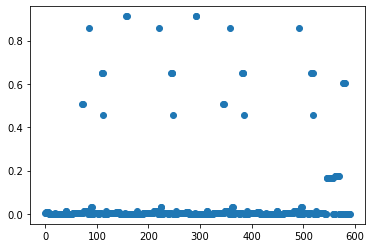

In [7]:
# Percentage of missing values in each column
secom_nan = pd.DataFrame(data_secom.isnull().sum(), columns=['nan_count'])
secom_nan['nan_percent'] = secom_nan['nan_count'] / len(data_secom)
plt.scatter(range(0, secom_nan.shape[0]),secom_nan['nan_percent'])
plt.show()

In [8]:
# Drop columns with more than 40% missing values
secom_nan_40up = secom_nan[secom_nan['nan_percent'] > 0.4]
nan_column_droplist = secom_nan_40up.index
data_secom_clean = data_secom_clean.drop(nan_column_droplist, axis = 1)
print(data_secom_clean.shape)

(1567, 443)


In [9]:
# Missing Value Imputation: K-Nearest Neighbour (KNN) Imputation
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean') # default
data_secom_clean_imputed = pd.DataFrame(knn_imputer.fit_transform(data_secom_clean), columns=data_secom_clean.columns)
print(data_secom_clean_imputed.shape)
print ('Number of missing values: ', data_secom_clean_imputed.isnull().sum().sum())

(1567, 443)
Number of missing values:  0


In [10]:
# Split data into x and y
data_secom_x = data_secom_clean_imputed.iloc[:, :-1]
data_secom_y = data_secom_clean_imputed['Label']
print(data_secom_x.shape)

(1567, 442)


###**(a) (15%) 試在該數據分析流程中加入數據平衡的步驟，使用三種方法來進行數據平衡 (e.g. 使用上抽樣、下抽樣或是代價敏感學習等)。**


In [ ]:
# Check if Y is imbalanced
data_secom_y.value_counts()

-1.0    1463
 1.0     104
Name: Label, dtype: int64

#### **Undersampling: Near Miss Undersampling**
https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [ ]:
from imblearn.under_sampling import NearMiss
data_secom_nearmiss_x, data_secom_nearmiss_y = NearMiss(version=3).fit_resample(data_secom_x, data_secom_y)
data_secom_nearmiss_y.value_counts()

-1.0    104
 1.0    104
Name: Label, dtype: int64

#### **Oversampling: SMOTE**
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [ ]:
from imblearn.over_sampling import SMOTE
data_secom_smote_x, data_secom_smote_y = SMOTE(random_state=42).fit_resample(data_secom_x, data_secom_y)
data_secom_smote_y.value_counts()

-1.0    1463
 1.0    1463
Name: Label, dtype: int64

###**(b) (5%) 建議選用哪種方法最為合適？為什麼？**

###**(c) (10%) 對於數據多數群與少數群的比例應當調整至多少？為什麼？試透過調整生成比率 (i.e. 敏感度分析) 來看模型分類結果。(提示：將敏感度分析以繪圖呈現兩條曲線，x 軸為 不同生成比例、y 軸為偽陽性率 (false positive rate) 與偽陰性率 (false negative rate)**


###**(d) (10%) 試說明特徵挑選步驟應於數據平衡前或後，這對預測結果有何影響？**





---


##**2. (30%) Programming Questions**

Please use Python to answer the following questions. Provide your code and justify your answer. Show all your work in detail including specific algorithm and parameter design. You should hand in ***TWO files (one for Tabu and one for Genetic Algorithm)*** regarding to each meta-heuristic algorithm, respectively. The result should include ***optimal solution (i.e., job sequence), optimal function (i.e. fitness) value, running time, number of tardy jobs***. For the parameter settings (eg. tabu size, crossover rate, mutation rate, etc.), please give a simple ***trial-and-error*** or ***design of experiment*** for sensitivity analysis.

Single-Machine Scheduling Problem

Please answer following single-machine total weighted tardiness problem. The objective function is to minimize the total weighted tardiness.


<img src="https://drive.google.com/uc?export=view&id=1UdN2GZjCKRltwgmj24pRVJN8QIgtwavX" width="800"/>


In [11]:
import time

In [12]:
input_data = {1: {'processing_time': 10, 'due_date': 50, 'weight': 10},
              2: {'processing_time': 10, 'due_date': 38, 'weight': 5},
              3: {'processing_time': 13, 'due_date': 49, 'weight': 1},
              4: {'processing_time': 4, 'due_date': 12, 'weight': 5},
              5: {'processing_time': 9, 'due_date': 20, 'weight': 10},
              6: {'processing_time': 4, 'due_date': 105, 'weight': 1},
              7: {'processing_time': 8, 'due_date': 73, 'weight': 5},
              8: {'processing_time': 15, 'due_date': 45, 'weight': 10},
              9: {'processing_time': 7, 'due_date': 6, 'weight': 5},
              10: {'processing_time': 1, 'due_date': 64, 'weight': 1},
              11: {'processing_time': 9, 'due_date': 15, 'weight': 5},
              12: {'processing_time': 3, 'due_date': 6, 'weight': 10},
              13: {'processing_time': 15, 'due_date': 92, 'weight': 10},
              14: {'processing_time': 9, 'due_date': 43, 'weight': 5},
              15: {'processing_time': 11, 'due_date': 78, 'weight': 1},
              16: {'processing_time': 6, 'due_date': 21, 'weight': 10},
              17: {'processing_time': 5, 'due_date': 15, 'weight': 5},
              18: {'processing_time': 14, 'due_date': 50, 'weight': 5},
              19: {'processing_time': 18, 'due_date': 150, 'weight': 1},
              20: {'processing_time': 3, 'due_date': 99, 'weight': 5}}

###**(a) (0%) Learn Genetic**

https://www.youtube.com/watch?v=kHyNqSnzP8Y 

https://www.youtube.com/watch?v=Fdk7ZKJHFcI .

###**(b) (15%) Develop Tabu Search (TS) algorithm to solve the problem. Show your design and the “result”.**

Reference: https://medium.com/swlh/tabu-search-in-python-3199c44d44f1

In [13]:
import random as rd
from itertools import combinations
import math

In [20]:
class TS():
    def __init__(self, seed, tabu_tenure, terminate):
    # def __init__(self, seed, tabu_tenure, Penalization_weight):
        self.start_time_tabu = time.time()
        self.seed = seed
        self.tabu_tenure = tabu_tenure # Tabu list size
        self.terminate = terminate
        # self.Penalization_weight = Penalization_weight
        self.input_dict = input_data
        self.Initial_solution = self.get_InitialSolution()
        self.tabu_str, self.Best_solution, self.Best_objvalue, self.Best_tardy_jobs = self.TabuSearch()
        self.end_time_tabu = time.time()
        # print("Running time: {}".format(end_time_tabu - start_time_tabu))
        # self.tabu_result = self.Result()

    def get_tabuestructure(self):
        '''
        Takes a dict (input data)
        Returns a dict of tabu attributes (pair of jobs that are swapped) as keys and [tabu_time, MoveValue]
        '''
        dict = {}
        for swap in combinations(self.input_dict.keys(), 2):
            dict[swap] = {'tabu_time': 0, 'MoveValue': 0}
            # dict[swap] = {'tabu_time': 0, 'MoveValue': 0, 'freq': 0, 'Penalized_MV': 0}
        return dict

    def get_InitialSolution(self, show=False):
        n_jobs = len(self.input_dict) # number of jobs
        # Produce a random schedule of jobs
        initial_solution = list(range(1, n_jobs+1))
        rd.seed(self.seed)
        rd.shuffle(initial_solution)
        if show == True:
            print("initial Random Solution: {}".format(initial_solution))
        return initial_solution

    def Objfun(self, solution, show=False):
        '''
        Takes a set of scheduled jobs, dict (input data)
        Return the objective function value of the solution
        '''
        dict = self.input_dict
        t = 0   # starting time
        objfun_value = 0
        n_tardy_jobs = 0   # number of tardy jobs

        for job in solution:
            C_i = t + dict[job]["processing_time"]  # completion time
            d_i = dict[job]["due_date"]   # due date of the job
            T_i = max(0, C_i - d_i)    # tardiness for the job
            W_i = dict[job]["weight"]  # job's weight

            objfun_value +=  W_i * T_i
            t = C_i
            if T_i > 0:
                n_tardy_jobs += 1
        
        if show == True:
            print("\n","#"*8, "The Objective function value for {} solution schedule is: {}".format(solution ,objfun_value),"#"*8)
        return objfun_value, n_tardy_jobs

    def SwapMove(self, solution, i ,j):
        '''
        Take a list (solution)
        return a new neighbor solution with i, j swapped
        '''
        solution = solution.copy()
        # job index in the solution:
        i_index = solution.index(i)
        j_index = solution.index(j)
        #Swap
        solution[i_index], solution[j_index] = solution[j_index], solution[i_index]
        return solution

    def TabuSearch(self, show=False):
        '''
        The implementation Tabu search algorithm with short-term memory and pair_swap as Tabu attribute.
        '''
        # Parameters:
        tenure =self.tabu_tenure
        tabu_structure = self.get_tabuestructure()  # Initialize the data structures
        best_solution = self.Initial_solution
        best_objvalue, best_tardy_jobs = self.Objfun(best_solution)
        current_solution = self.Initial_solution
        current_objvalue, current_tardy_jobs = self.Objfun(current_solution)

        if show == True:
            print("#"*30, "Short-term memory TS with Tabu Tenure: {}\nInitial solution: {}, Initial objvalue: {}, Initial tardy jobs: {}".format(
                tenure, current_solution, current_objvalue, current_tardy_jobs), "#"*30, sep='\n\n')
        iter = 1
        Terminate = 0
        while Terminate < self.terminate:
            if show == True:
                print('\n\n### iter {}###  Current_Objvalue: {}, Best_Objvalue: {}, Best_Tardy_Jobs: {}'.format(iter, current_objvalue, best_objvalue, best_tardy_jobs))
            
            # Searching the whole neighborhood of the current solution:
            for move in tabu_structure:
                candidate_solution = self.SwapMove(current_solution, move[0], move[1])
                candidate_objvalue, candidate_tardy_jobs = self.Objfun(candidate_solution)
                tabu_structure[move]['MoveValue'] = candidate_objvalue
                # Penalized objValue by adding freq to Objvalue (minimization):
                # tabu_structure[move]['Penalized_MV'] = candidate_objvalue + (tabu_structure[move]['freq'] * self.Penalization_weight)

            # Admissible move
            while True:
                # select the move with the lowest ObjValue in the neighborhood (minimization)
                best_move = min(tabu_structure, key =lambda x: tabu_structure[x]['MoveValue'])
                MoveValue = tabu_structure[best_move]["MoveValue"]
                tabu_time = tabu_structure[best_move]["tabu_time"]
                # Penalized_MV = tabu_structure[best_move]["Penalized_MV"]

                # Not Tabu
                if tabu_time < iter:
                    # make the move
                    current_solution = self.SwapMove(current_solution, best_move[0], best_move[1])
                    current_objvalue, current_tardy_jobs = self.Objfun(current_solution)
                    # Best Improving move
                    if MoveValue < best_objvalue:
                        best_solution = current_solution
                        best_objvalue = current_objvalue
                        if show == True:
                            print("   best_move: {}, Objvalue: {} => Best Improving => Admissible".format(best_move, current_objvalue))
                        Terminate = 0
                    else:
                        if show == True:
                            print("   ##Termination: {}## best_move: {}, Objvalue: {} => Least non-improving => "
                              "Admissible".format(Terminate, best_move, current_objvalue))
                        Terminate += 1
                    # update tabu_time for the move
                    tabu_structure[best_move]['tabu_time'] = iter + tenure
                    # tabu_structure[best_move]['freq'] += 1
                    iter += 1
                    break

                # If tabu
                else:
                    # Aspiration
                    if MoveValue < best_objvalue:
                        # make the move
                        current_solution = self.SwapMove(current_solution, best_move[0], best_move[1])
                        current_objvalue, current_tardy_jobs = self.Objfun(current_solution)
                        best_solution = current_solution
                        best_objvalue = current_objvalue
                        if show == True:
                            print("   best_move: {}, Objvalue: {} => Aspiration => Admissible".format(best_move, current_objvalue))
                        # tabu_structure[best_move]['freq'] += 1
                        Terminate = 0
                        iter += 1
                        break
                    else:
                        tabu_structure[best_move]["MoveValue"] = float('inf')
                        # tabu_structure[best_move]['Penalized_MV'] = float('inf')
                        if show == True:
                            print("   best_move: {}, Objvalue: {} => Tabu => Inadmissible".format(best_move, current_objvalue))
                        continue
        if show == True:
            print('\n\n','#'*50)
            print("Performed iterations: {}\nOptimal solution: {}\nOptimal function value: {}\nNumber of tardy jobs: {}".format(iter, best_solution, best_objvalue, best_tardy_jobs), sep="\n\n")
        return tabu_structure, best_solution, best_objvalue, best_tardy_jobs

    def Result(self):
        return "Optimal solution: {}\nOptimal function value: {}\nNumber of tardy jobs: {}\nRunning time: {}".format(self.Best_solution, self.Best_objvalue, self.Best_tardy_jobs, self.end_time_tabu - self.start_time_tabu)


In [21]:
# min_fitness_tabu = 9999
# for i in range(1,21):
#     tabu = TS(seed = 2022, tabu_tenure=3)
#     print(tabu.Best_objvalue)
# test = TS(seed = 2022, tabu_tenure = 3, terminate = 100)
# test = TS(seed = 2022, tabu_tenure=3, Penalization_weight=0.6)
# print(test.Result())

Optimal solution:[12, 17, 4, 16, 5, 9, 8, 1, 11, 10, 7, 13, 20, 14, 2, 18, 6, 15, 3, 19]
Optimal function value:1928
Number of tardy jobs:14
Running time:0.08411622047424316


In [ ]:
# Optimal solution:[12, 17, 4, 16, 5, 9, 8, 1, 11, 10, 7, 13, 20, 14, 2, 18, 6, 15, 3, 19]
# Optimal function value:1928
# Number of tardy jobs:14
# Running time:0.3053591251373291

#### **Sensitivity Analysis**

tabu_size

In [30]:
tabu_analysis = pd.DataFrame(columns=['seeds','tabu size','fitness','tardy'])
min_fitness_tabu = 9999
for i in range(2000, 3000, 100):
    for j in range(1, 20):
        tabu = TS(seed = i, tabu_tenure=j, terminate = 100)
        item = {'seeds': i,
                'tabu size': j,
                'fitness': tabu.Best_objvalue,
                'tardy': tabu.Best_tardy_jobs,
        }
        item_df = pd.DataFrame(item, index=[0])
        tabu_analysis = tabu_analysis.append(item_df)
        if tabu.Best_objvalue < min_fitness_tabu:
          min_fitness_tabu = tabu.Best_objvalue
          tabu_result = tabu.Result()     

tabu_analysis = tabu_analysis.reset_index(drop=True)
tabu_analysis

,seeds,tabu size,fitness,tardy
0,2000,1,1928,16
1,2000,2,1928,16
2,2000,3,1928,16
3,2000,4,1928,16
4,2000,5,1928,16
...,...,...,...,...
185,2900,15,1928,14
186,2900,16,1928,14
187,2900,17,1928,14
188,2900,18,1928,14


In [31]:
# Overview
tabu_analysis['fitness'] = tabu_analysis['fitness'].astype(int)
tabu_analysis['tardy'] = tabu_analysis['tardy'].astype(int)
tabu_analysis.describe()

,fitness,tardy
count,190.0,190.000000
mean,1928.0,14.800000
std,0.0,1.473577
min,1928.0,13.000000
25%,1928.0,14.000000
50%,1928.0,14.500000
75%,1928.0,16.000000
max,1928.0,18.000000


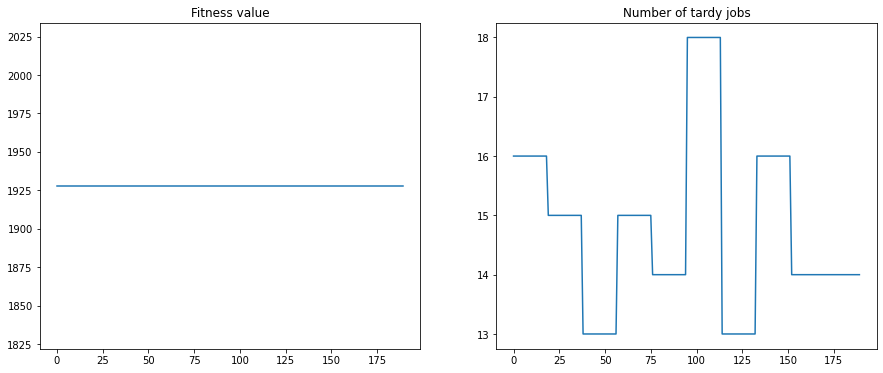

In [32]:
# Plot
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax0.plot(tabu_analysis['fitness'])
ax0.set_title('Fitness value')
ax1.plot(tabu_analysis['tardy'])
ax1.set_title('Number of tardy jobs')
plt.show()

由上方 fitness value 的圖可以看到不管調整 seeds 或是 tabu size，fitness value 都是一樣的結果，因此這裡以最小的 number of tardy jobs 作為最佳解。

In [33]:
# Minimum number of tardy jobs
minvalueID_tardy = tabu_analysis['tardy'].idxmin()
tabu_analysis.iloc[minvalueID_tardy, :]

seeds        2200
tabu size       1
fitness      1928
tardy          13
Name: 38, dtype: object

In [35]:
tabu_result = TS(seed = 2200, tabu_tenure=3, terminate = 1000).Result()
print(tabu_result)

Optimal solution:[12, 17, 4, 16, 5, 9, 8, 1, 14, 10, 7, 13, 20, 11, 2, 18, 6, 15, 3, 19]
Optimal function value:1928
Number of tardy jobs:13
Running time:2.6200504302978516


###**(c) (15%) Develop Genetic Algorithm (GA) to solve the problem. Show your design and the “result”.**




In [ ]:
import copy

In [ ]:
# Input data
input_data_list = pd.DataFrame(input_data).values.tolist()
num_job = len(input_data)
p = input_data_list[0]
d = input_data_list[1]
w = input_data_list[2]

In [ ]:
# Parameters
population_size = 30
mutation_selection_rate = 0.5
num_mutation_jobs = round(num_job*mutation_selection_rate)
# num_iteration = 1000

In [ ]:
class GA():
    def __init__(self, crossover_rate, mutation_rate, num_iteration):
        self.start_time_ga = time.time()
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate 
        self.num_iteration = num_iteration  
        self.Tbest, self.population_list = self.InitialPopulation()
        self.best_sequence, self.best_value, self.num_tardy = self.CrossoverMutation()
        self.end_time_ga = time.time()

    def InitialPopulation(self):
        Tbest=99999999999
        best_list, best_obj = [], []
        population_list = []
        for i in range(population_size):
            random_num = list(np.random.permutation(num_job))   # generate a random permutation of 0 to num_job-1
            population_list.append(random_num)   # add to the population_list
        return Tbest, population_list

    def CrossoverMutation(self):
        for n in range(self.num_iteration):
            Tbest_now = 9999999

            # Crossover
            parent_list = copy.deepcopy(self.population_list)
            offspring_list = copy.deepcopy(self.population_list)
            S = list(np.random.permutation(population_size))   # generate a random sequence to select the parent chromosome to crossover
    
            for m in range(int(population_size/2)):
                crossover_prob = np.random.rand()
                if self.crossover_rate >= crossover_prob:
                    parent_1 = self.population_list[S[2*m]][:]
                    parent_2 = self.population_list[S[2*m+1]][:]
                    child_1 = ['na' for i in range(num_job)]
                    child_2 = ['na' for i in range(num_job)]
                    fix_num = round(num_job/2)
                    g_fix = list(np.random.choice(num_job, fix_num, replace=False))
            
                    for g in range(fix_num):
                        child_1[g_fix[g]] = parent_2[g_fix[g]]
                        child_2[g_fix[g]] = parent_1[g_fix[g]]
                    c1 = [parent_1[i] for i in range(num_job) if parent_1[i] not in child_1]
                    c2 = [parent_2[i] for i in range(num_job) if parent_2[i] not in child_2]
            
                    for i in range(num_job-fix_num):
                        child_1[child_1.index('na')] = c1[i]
                        child_2[child_2.index('na')] = c2[i]
                    offspring_list[S[2*m]] = child_1[:]
                    offspring_list[S[2*m+1]] = child_2[:]

            # Mutation
            for m in range(len(offspring_list)):
                mutation_prob=np.random.rand()
                if self.mutation_rate >= mutation_prob:
                    m_chg = list(np.random.choice(num_job, num_mutation_jobs, replace=False))   # chooses the position to mutation
                    t_value_last = offspring_list[m][m_chg[0]]   # save the value which is on the first mutation position
                    for i in range(num_mutation_jobs-1):
                        offspring_list[m][m_chg[i]] = offspring_list[m][m_chg[i+1]]   # displacement
                    offspring_list[m][m_chg[num_mutation_jobs-1]] = t_value_last   # move the value of the first mutation position to the last mutation position
    
            # Fitness value (calculate tardiness)
            total_chromosome = copy.deepcopy(parent_list) + copy.deepcopy(offspring_list) # parent and offspring chromosomes combination
            chrom_fitness, chrom_fit = [], []
            total_fitness = 0
            for i in range(population_size*2):
                ptime = 0
                tardiness = 0
                for j in range(num_job):
                    ptime = ptime + p[total_chromosome[i][j]]
                    tardiness = tardiness + w[total_chromosome[i][j]]*max(ptime-d[total_chromosome[i][j]],0)
                chrom_fitness.append(1/tardiness)
                chrom_fit.append(tardiness)
                total_fitness = total_fitness + chrom_fitness[i]
    
            # Selection
            pk, qk = [], []

            for i in range(population_size*2):
                pk.append(chrom_fitness[i]/total_fitness)
            for i in range(population_size*2):
                cumulative = 0
                for j in range(0,i+1):
                    cumulative = cumulative+pk[j]
                qk.append(cumulative)
    
            selection_rand = [np.random.rand() for i in range(population_size)]
    
            for i in range(population_size):
                if selection_rand[i] <= qk[0]:
                    self.population_list[i] = copy.deepcopy(total_chromosome[0])
                else:
                    for j in range(0,population_size*2-1):
                        if selection_rand[i] > qk[j] and selection_rand[i] <= qk[j+1]:
                            self.population_list[i] = copy.deepcopy(total_chromosome[j+1])
                            break
            # Comparison
            for i in range(population_size*2):
                if chrom_fit[i] < Tbest_now:
                    Tbest_now = chrom_fit[i]
                    sequence_now = copy.deepcopy(total_chromosome[i])
    
            if Tbest_now <= self.Tbest:
                self.Tbest = Tbest_now
                sequence_best = copy.deepcopy(sequence_now)
    
            job_sequence_ptime = 0
            num_tardy = 0
            for k in range(num_job):
                job_sequence_ptime = job_sequence_ptime + p[sequence_best[k]]
                if job_sequence_ptime > d[sequence_best[k]]:
                    num_tardy += 1

        return sequence_best, self.Tbest, num_tardy

    def Result(self):
        return "Optimal solution: {}\nOptimal function value: {}\nNumber of tardy jobs: {}\nRunning time: {}".format(self.best_sequence, self.best_value, self.num_tardy, self.end_time_ga - self.start_time_ga)

#### **Sensitivity Analysis**

crossover rate & mutation rate

In [ ]:
ga_result = ""

In [ ]:
ga_analysis = pd.DataFrame(columns=['crossover_rate','mutation_rate','fitness','tardy'])
min_fitness_ga = 9999
for i in np.arange(0, 1.1, 0.1):
    for j in np.arange(0, 1.1, 0.1):
        ga = GA(crossover_rate = i, mutation_rate = j, num_iteration = 100)
        item = {'crossover_rate': i,
                'mutation_rate': j,
                'fitness': ga.best_value,
                'tardy': ga.num_tardy,
        }
        item_df = pd.DataFrame(item, index=[0])
        ga_analysis = ga_analysis.append(item_df)
        if ga.best_value < min_fitness_ga:
          min_fitness_ga = ga.best_value
          ga_result = ga.Result()     

ga_analysis = ga_analysis.reset_index(drop=True)
ga_analysis

,crossover_rate,mutation_rate,fitness,tardy
0,0.0,0.0,4644,13
1,0.0,0.1,3267,14
2,0.0,0.2,3092,15
3,0.0,0.3,3333,16
4,0.0,0.4,2427,17
...,...,...,...,...
116,1.0,0.6,2502,14
117,1.0,0.7,2682,16
118,1.0,0.8,3136,13
119,1.0,0.9,2869,14


In [ ]:
# Overview
ga_analysis['fitness'] = ga_analysis['fitness'].astype(int)
ga_analysis['tardy'] = ga_analysis['tardy'].astype(int)
ga_analysis.describe()

,crossover_rate,mutation_rate,fitness,tardy
count,121.000000,121.000000,121.000000,121.000000
mean,0.500000,0.500000,2810.644628,14.330579
std,0.317543,0.317543,344.137711,1.457100
min,0.000000,0.000000,2116.000000,11.000000
25%,0.200000,0.200000,2584.000000,13.000000
50%,0.500000,0.500000,2817.000000,14.000000
75%,0.800000,0.800000,3054.000000,15.000000
max,1.000000,1.000000,4644.000000,19.000000


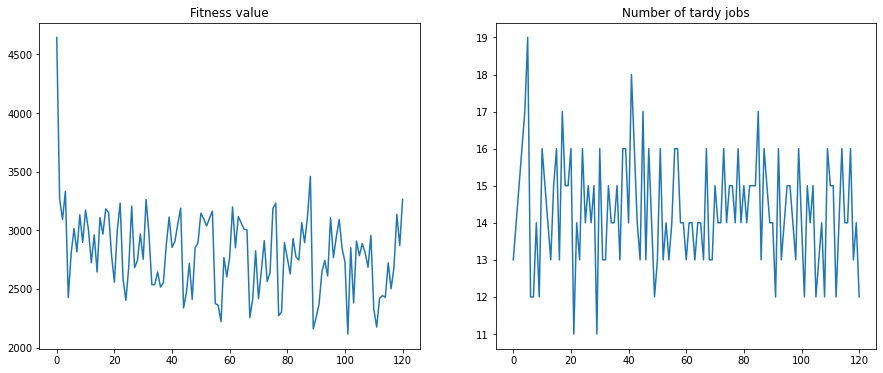

In [ ]:
# Plot
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax0.plot(ga_analysis['fitness'])
ax0.set_title('Fitness value')
ax1.plot(ga_analysis['tardy'])
ax1.set_title('Number of tardy jobs')
plt.show()

In [ ]:
# Minimum fitness value
minvalueID_fitness = ga_analysis['fitness'].idxmin()
ga_analysis.iloc[minvalueID_fitness, :]

crossover_rate       0.9
mutation_rate        0.2
fitness           2116.0
tardy               12.0
Name: 101, dtype: float64

In [ ]:
# Minimum number of tardy jobs
minvalueID_tardy = ga_analysis['tardy'].idxmin()
ga_analysis.iloc[minvalueID_tardy, :]

crossover_rate       0.1
mutation_rate        1.0
fitness           2997.0
tardy               11.0
Name: 21, dtype: float64

In [ ]:
# Sort by fitness values
ga_analysis_sort = ga_analysis.sort_values(by=['fitness'])
ga_analysis_sort.iloc[:10, :]

,crossover_rate,mutation_rate,fitness,tardy
101,0.9,0.2,2116,12
89,0.8,0.1,2159,14
111,1.0,0.1,2175,15
57,0.5,0.2,2222,16
67,0.6,0.1,2256,16
90,0.8,0.2,2258,14
77,0.7,0.0,2272,14
78,0.7,0.1,2305,16
110,1.0,0.0,2328,15
44,0.4,0.0,2338,13


#### **Final result**

In [ ]:
print(ga_result)



---


##**3. (30%) Markov Decision Process**

考慮一個沒有折損因子的機台維修保養的馬可夫決策過程，機台有四個狀態 (健康, 可用, 耗損, 損壞)，其各別獎勵為 (6, 3, 1, -15)。「損壞」狀態為吸收狀態 (absorbing)，行動主要有兩種 (加工, 保養)。

*   在狀態「健康」的情況下，採取行動「加工」，轉移到「健康」的機率為 0.7；轉移到「可用」的機率為 0.2；轉移到「耗損」的機率為 0.1；轉移到「損壞」的機率為 0.0。

*   在狀態「健康」的情況下，採取行動「保養」，轉移到「健康」的機率為 1.0；轉移到其他狀態的機率為 0.0。

*   在狀態「可用」的情況下，採取行動「加工」，轉移到「健康」的機率為 0.0；轉移到「可用」的機率為 0.6；轉移到「耗損」的機率為 0.3；轉移到「損壞」的機率為 0.1。

*   在狀態「可用」的情況下，採取行動「保養」，轉移到「健康」的機率為 0.8；轉移到「可用」的機率為 0.2；轉移到其他狀態的機率為 0.0。

*   在狀態「耗損」的情況下，採取行動「加工」，轉移到「健康」的機率為 0.0；轉移到「可用」的機率為 0.1；轉移到「耗損」的機率為 0.5；轉移到「損壞」的機率為 0.4。

*   在狀態「耗損」的情況下，採取行動「保養」，轉移到「健康」的機率為 0.2；轉移到「可用」的機率為 0.5；轉移到「耗損」的機率為 0.3；轉移到「損壞」的機率為 0.0。

試著參考網路資源學習並撰寫程式，使用此數據回答下列問題。

###**(a) (5%) 試根據題目繪製轉移機率圖(transition probability diagram)**



In [ ]:
# Import the MarkovChain class from markovchain.py
from markovchain import MarkovChain
P = np.array([
    [0.7, 0.2, 0.1, 0.0],
    [1.0, 0.0, 0.0, 0.0],
    [0.0, 0.6, 0.3, 0.1],
    [0.8, 0.2, 0.0, 0.0],
    [0.0, 0.1, 0.5, 0.4],
    [0.2, 0.5, 0.3, 0.0],
])
mc = MarkovChain(P, ['1', '2', '3', '4'])
mc.draw("../img/markov-chain-four-states.png")

###**(b) (10%) 使用價值迭代來決定最佳策略以及各個狀態的價值**


###**(c) (10%) 使用策略迭代來決定最佳策略以及各個狀態的價值，假設初始策略為在所有狀態皆採取行動「加工」**


###**(d) (5%) (d)承接(c)的答案，如果初始策略在所有狀態皆採取行動「保養」，策略迭代的計算過程與結果有什麼差異?**
